In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
from scipy import stats
import seaborn as sns
import math

In [6]:
# Read bacteria data and human meta data

supp_12_17_excel='../Priya_et_al_Supplementary_Tables/Supplementary Tables S12-S17.xlsx'
supp_1_excel='../Priya_et_al_Supplementary_Tables/Supplementary Table S1.xlsx'

CRC_genes=pd.read_excel(supp_12_17_excel,engine='openpyxl',sheet_name='S12',index_col=0)
IBD_genes=pd.read_excel(supp_12_17_excel,engine='openpyxl',sheet_name='S14',index_col=0)
IBS_genes=pd.read_excel(supp_12_17_excel,engine='openpyxl',sheet_name='S16',index_col=0)

CRC_metadata = pd.read_excel(supp_1_excel,engine='openpyxl',sheet_name='CRC_metadata',index_col=0)
IBD_metadata = pd.read_excel(supp_1_excel,engine='openpyxl',sheet_name='IBD_metadata',index_col=0)
IBS_metadata = pd.read_excel(supp_1_excel,engine='openpyxl',sheet_name='IBS_metadata',index_col=1)

In [7]:
def removeOutliers(df, columnName):
    outliers = df[np.abs(stats.zscore(df[columnName])) > 3].all(axis=1)
    return df.drop(outliers.index)

# Standardize column names and data by removing outliers
def processDataframe(geneData, metadata, gene, disease):
    if (disease == 'CRC'):
        classificationColumn = 'Description';
        controlIdentifier = 'normal'
    
    elif (disease == 'IBD'):
        classificationColumn = 'Diagnosis';
        controlIdentifier = 'nonIBD'
    
    elif (disease == 'IBS'):
        classificationColumn = 'Cohort';
        controlIdentifier = 'Healthy';
        
    filteredGeneData = geneData.loc[gene].to_frame()
    filteredGeneData = removeOutliers(filteredGeneData, gene)
    filteredGeneData = filteredGeneData.join(metadata).reindex(columns=[gene, classificationColumn])
    filteredGeneData['patient_type'] = ['control' 
                                        if x == controlIdentifier 
                                        else 'case' 
                                        for x in filteredGeneData[classificationColumn]
                                       ]
    
    filteredGeneData['Disease'] = disease
    return filteredGeneData;

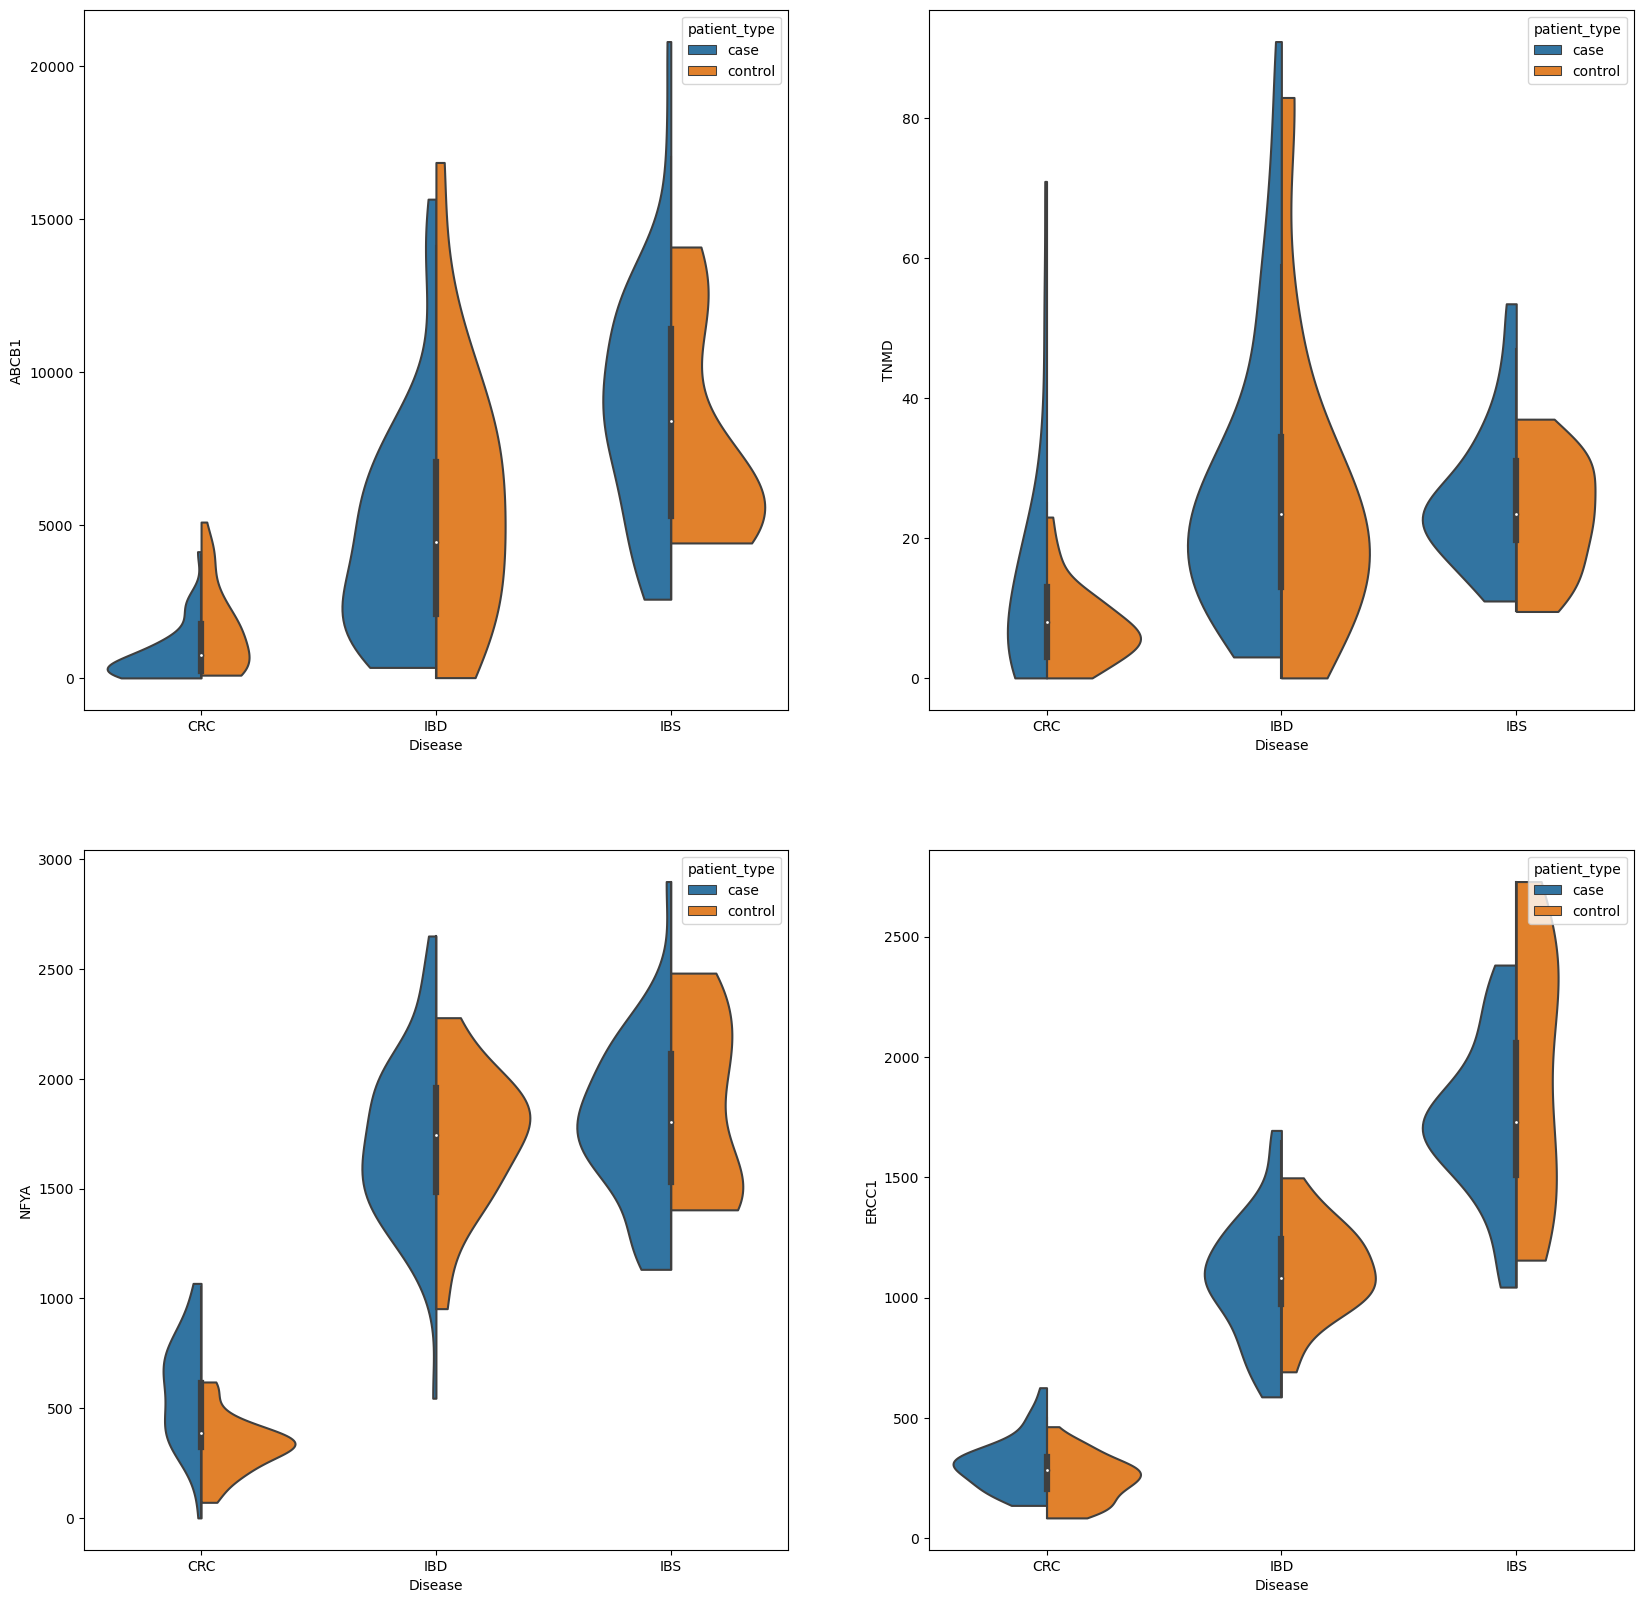

In [8]:
# Provide your gene list here
gene_list = ['ABCB1', 'TNMD', 'NFYA', 'ERCC1']

size = (len(gene_list)/2)*10
rows = math.ceil(len(gene_list)/2)
fig, axes = plt.subplots(rows, 2, figsize=(20,size))

# Plot gene expression for each disease as a violin plot. 
# The 2 sides represents spread of density for 'controls' and 'cases'.
for index, gene in enumerate(gene_list):
    crc_df = processDataframe(CRC_genes, CRC_metadata, gene, 'CRC');
    ibd_df = processDataframe(IBD_genes, IBD_metadata, gene, 'IBD');
    ibs_df = processDataframe(IBS_genes, IBS_metadata, gene, 'IBS')
    
    df = pd.concat([crc_df, ibd_df, ibs_df], axis=0);
    
    col = index%2;
    row = math.floor(index/2);
    sns.violinplot(y=gene,x='Disease',data=df, hue='patient_type', split=True, cut=0, ax=axes[row][col])

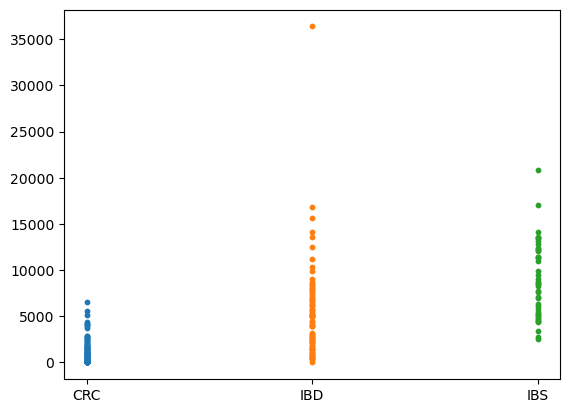

In [9]:
# Visualize the spread of gene expression values for each disease

data_new = pd.DataFrame(CRC_genes.loc[gene_list[0]])
data_new_1 = pd.DataFrame(IBD_genes.loc[gene_list[0]])
data_new_2 = pd.DataFrame(IBS_genes.loc[gene_list[0]])
data_new.head()

xList = ['CRC']*len(data_new)
xList_1 = ['IBD']*len(data_new_1)
xList_2 = ['IBS']*len(data_new_2)

human_gene = 'ABCB1'
plt.scatter(y=data_new[human_gene], x=xList, s=10)
plt.scatter(y=data_new_1[human_gene], x=xList_1, s=10)
plt.scatter(y=data_new_2[human_gene], x=xList_2, s=10)